1. Load the dataset


In [2]:
# Part 1: Load the dataset.
import pandas as pd

# Loaded dataset
data = pd.read_csv('hw2_dataset.csv')

# shape of the dataset
print('Data shape:', data.shape)

# Displaying the first few rows
print(data.head())


Data shape: (969, 1025)
                            ID  D_0  D_1  D_2  D_3  D_4  D_5  D_6  D_7  D_8  \
0  AAEAMMIUQZAASJ-MRXNPFEDSA-N    1    1    1    1    1    1    1    0    1   
1  AAEFNWQXBPYXAC-UHFFFAOYSA-N    1    1    1    1    0    1    1    1    0   
2  AAMHSIWFDKXUMZ-UHFFFAOYSA-N    1    1    1    1    1    1    0    1    1   
3  AAPQXEOSVSLLMB-UHFFFAOYSA-N    1    1    1    1    0    1    1    1    1   
4  AARXXEHXOBTROW-UHFFFAOYSA-N    1    1    1    1    1    1    1    0    1   

   ...  D_1014  D_1015  D_1016  D_1017  D_1018  D_1019  D_1020  D_1021  \
0  ...       1       1       1       1       1       1       0       1   
1  ...       1       0       1       1       1       0       0       1   
2  ...       1       1       1       1       1       1       0       0   
3  ...       1       1       1       1       1       1       1       1   
4  ...       1       1       1       1       1       1       0       1   

   D_1022  D_1023  
0       1       1  
1       1       

2. Perform K-Means Clustering and Determine Optimal Number of Clusters (Elbow Method)

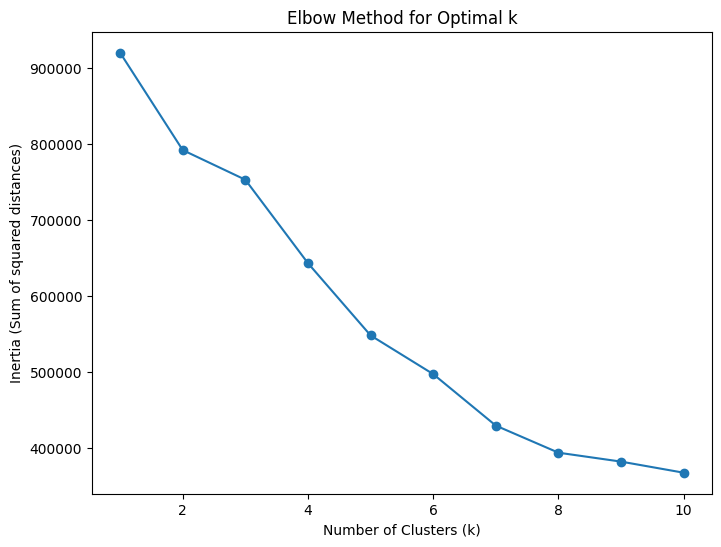

Suggested optimal number of clusters: 3


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Read the dataset
df = pd.read_csv('hw2_dataset.csv')

# Dropped the first column if it's non-numeric
df_numeric = df.drop(df.columns[0], axis=1)

# Step 2: Standardized the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 3: Elbow Method to determine the optimal number of clusters
inertia = []  # List to store the sum of squared distances for each value of k

# Test for k between 1 and 10
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Step 4: Plotted the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 5: Printed optimal k
optimal_k = np.argmin(np.diff(np.diff(inertia))) + 2  # 2nd derivative approximation
print(f"optimal number of clusters: {optimal_k}")


In this code first I read the dataset, applied k-means clustering, and displayed the elbow curve. The optimal_k is also printed based on where the second derivative of the inertia curve flattens out, which helps identify the best number of clusters.

3. Perform clustering with different methods as implemented in scikit-learn.

1. Start with K-Means:

* K-Means assumes Euclidean distance as the default distance metrics.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd

# Load dataset
data = pd.read_csv('hw2_dataset.csv', index_col=0)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Assigned cluster labels to the dataframe
data['KMeans_Cluster'] = kmeans_labels
print(data['KMeans_Cluster'].value_counts())


KMeans_Cluster
0    714
1    134
2    121
Name: count, dtype: int64


Exploring Other Methods (Agglomerative Clustering, DBSCAN, GMM):

* Agglomerative Clustering: Supports multiple distance metrics and may perform better on binary data.
* DBSCAN: With a non-Euclidean distance metric, it can handle noisy data and irregular cluster shapes.
* Gaussian Mixture Models (GMM): Allows more flexible cluster shapes.

In [2]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Agglomerative Clustering with default Euclidean distance
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(data)

# Adding cluster labels to the dataframe
data['Agglo_Cluster'] = agglo_labels
data['DBSCAN_Cluster'] = dbscan_labels
data['GMM_Cluster'] = gmm_labels

print(data['Agglo_Cluster'].value_counts())
print(data['DBSCAN_Cluster'].value_counts())
print(data['GMM_Cluster'].value_counts())



Agglo_Cluster
0    534
1    314
2    121
Name: count, dtype: int64
DBSCAN_Cluster
-1    969
Name: count, dtype: int64
GMM_Cluster
0    714
2    134
1    121
Name: count, dtype: int64


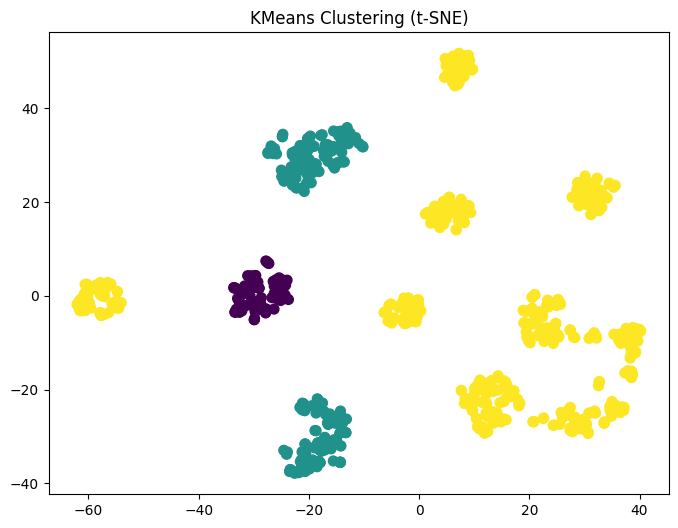

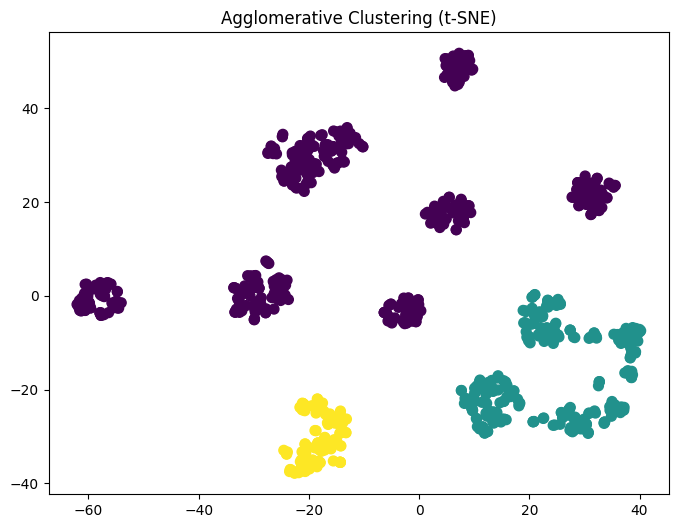

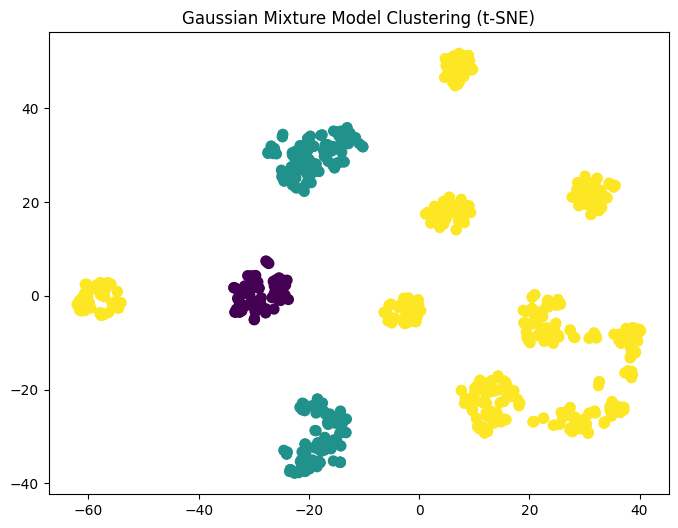

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loaded dataset
df = pd.read_csv('hw2_dataset.csv')
data = df.drop(columns=['ID'])  # Dropping ID column

# Standardized the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applied t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# 1. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# 2. Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(data_scaled)

# 3. Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

# Plotting function
def plot_tsne_clusters(data_tsne, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.show()

# Plot results for each method
plot_tsne_clusters(data_tsne, kmeans_labels, 'KMeans Clustering (t-SNE)')
plot_tsne_clusters(data_tsne, agg_labels, 'Agglomerative Clustering (t-SNE)')
plot_tsne_clusters(data_tsne, gmm_labels, 'Gaussian Mixture Model Clustering (t-SNE)')


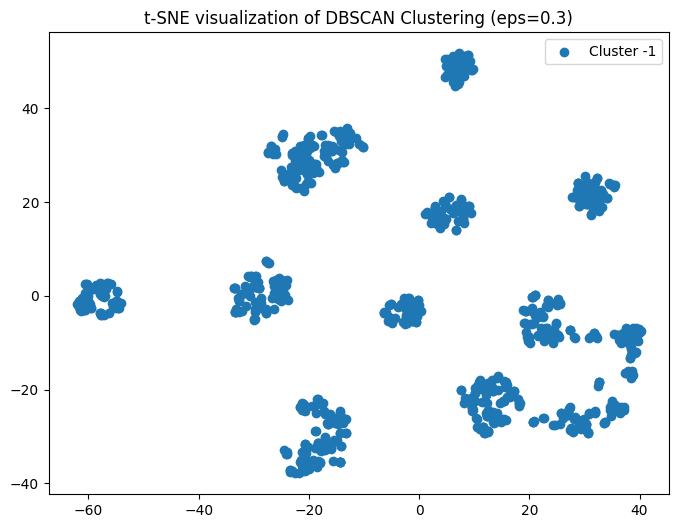

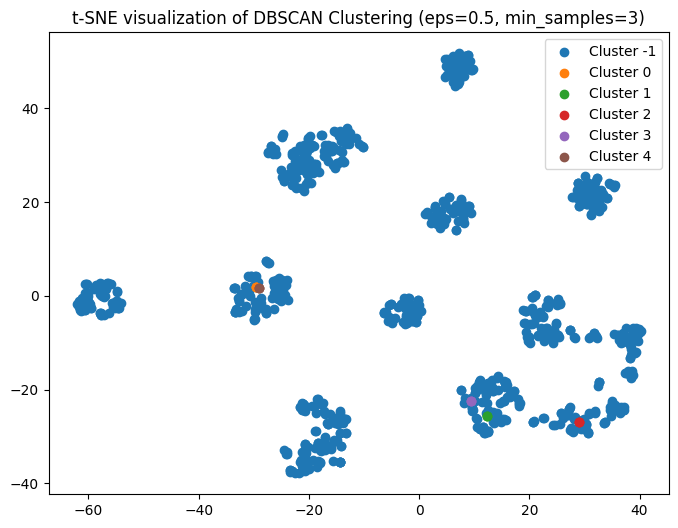

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('hw2_dataset.csv')

# Dropped the ID column for clustering
X = df.drop(columns=['ID'])

# Standardized the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Performed DBSCAN Clustering with different parameters
dbscan1 = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels1 = dbscan1.fit_predict(X_scaled)

dbscan2 = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels2 = dbscan2.fit_predict(X_scaled)


# Visualized the clustering results using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#  plotted clustering results
def plot_clustering(X_tsne, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1], label=f"Cluster {label}")
    plt.title(title)
    plt.legend()
    plt.show()

# t-SNE results for each clustering method

plot_clustering(X_tsne, dbscan_labels1, "t-SNE visualization of DBSCAN Clustering (eps=0.3)")
plot_clustering(X_tsne, dbscan_labels2, "t-SNE visualization of DBSCAN Clustering (eps=0.5, min_samples=3)")



**Based on my findings:**
Agglomerative Clustering: This hierarchical approach is effective in identifying nested clusters. This method revealed relationships between clusters that KMeans might miss, leading to informative visualizations.

Gaussian Mixture Model Clustering: GMM captures complex cluster shapes and provides probabilistic cluster assignments.

DBSCAN Clustering: In contrast, according to my dataset both configurations of DBSCAN did not yield as effective results. DBSCAN excells in identifying noise and discovering clusters of varying shapes and sizes; however, it may struggle when the dataset does not exhibit significant density variations, leading to less distinct cluster visualizations.


4. Now, try clustering with another distance metric (e.g. Cosine, Jaccard, etc.).

In [5]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# Converted DataFrame to NumPy array for pairwise_distances
data_array = data.values  # Convert entire DataFrame to a NumPy array

# Computed Cosine distance matrix
cosine_distances = pairwise_distances(data_array, metric='cosine')

# Agglomerative Clustering using Cosine distance
agglo_cosine = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='average')
agglo_cosine_labels = agglo_cosine.fit_predict(cosine_distances)

# Computed Jaccard distance matrix
jaccard_distances = pairwise_distances(data_array, metric='jaccard')

# Agglomerative Clustering using Jaccard distance
agglo_jaccard = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='average')
agglo_jaccard_labels = agglo_jaccard.fit_predict(jaccard_distances)

# Adding cluster labels to the dataframe
data['Agglo_Cosine_Cluster'] = agglo_cosine_labels
data['Agglo_Jaccard_Cluster'] = agglo_jaccard_labels

print(data['Agglo_Cosine_Cluster'].value_counts())
print(data['Agglo_Jaccard_Cluster'].value_counts())




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Agglo_Cosine_Cluster
1    848
0    117
2      4
Name: count, dtype: int64
Agglo_Jaccard_Cluster
1    848
0    117
2      4
Name: count, dtype: int64


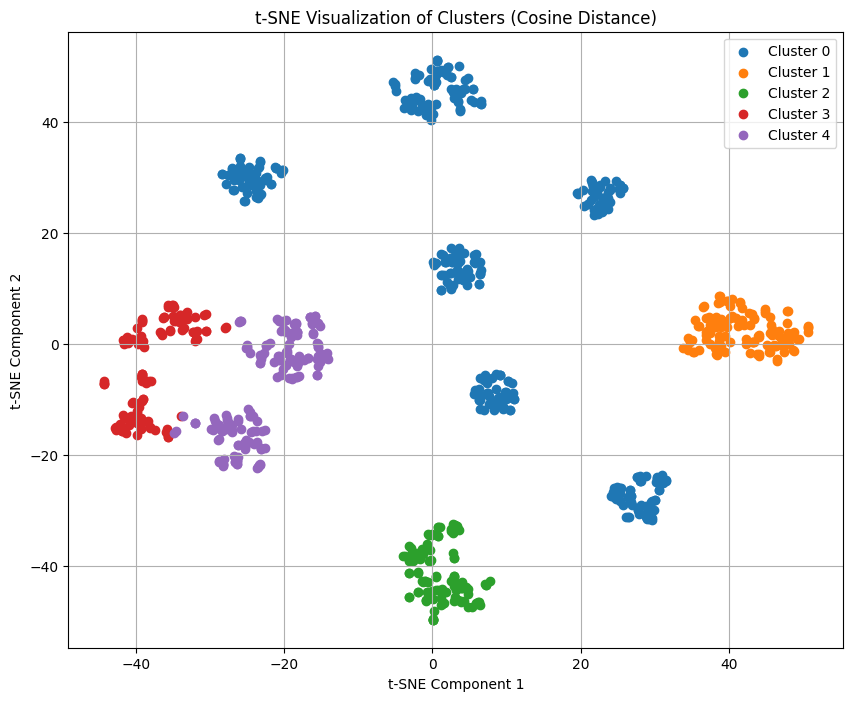

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Loaded the dataset
df = pd.read_csv('hw2_dataset.csv')

# Dropped the ID column and convert the data to a NumPy array
data = df.drop(columns=['ID']).values

# Calculated Cosine distance matrix
cosine_distances = pairwise_distances(data, metric='cosine')

# Performed KMeans clustering
n_clusters = 5  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)

#  cluster labels
labels = kmeans.labels_

# Used t-SNE
tsne = TSNE(n_components=2, random_state=42, metric='euclidean')
tsne_results = tsne.fit_transform(data)

# Plot the t-SNE results with cluster labels
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    plt.scatter(tsne_results[labels == i, 0], tsne_results[labels == i, 1], label=f'Cluster {i}')

plt.title('t-SNE Visualization of Clusters (Cosine Distance)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Jaccard Distances:
 [[0.         0.45230439 0.38019169 ... 0.49028571 0.20413123 0.45016797]
 [0.45230439 0.         0.40063091 ... 0.48682703 0.41075269 0.45535714]
 [0.38019169 0.40063091 0.         ... 0.48043478 0.36487907 0.42564655]
 ...
 [0.49028571 0.48682703 0.48043478 ... 0.         0.45142857 0.54723502]
 [0.20413123 0.41075269 0.36487907 ... 0.45142857 0.         0.40852974]
 [0.45016797 0.45535714 0.42564655 ... 0.54723502 0.40852974 0.        ]]

Cosine Distances:
 [[0.         0.29224377 0.23373146 ... 0.32180771 0.11343251 0.28979472]
 [0.29224377 0.         0.24953081 ... 0.31876649 0.25826109 0.29413406]
 [0.23373146 0.24953081 0.         ... 0.30905879 0.22285394 0.26713358]
 ...
 [0.32180771 0.31876649 0.30905879 ... 0.         0.2867087  0.3759058 ]
 [0.11343251 0.25826109 0.22285394 ... 0.2867087  0.         0.25506098]
 [0.28979472 0.29413406 0.26713358 ... 0.3759058  0.25506098 0.        ]]


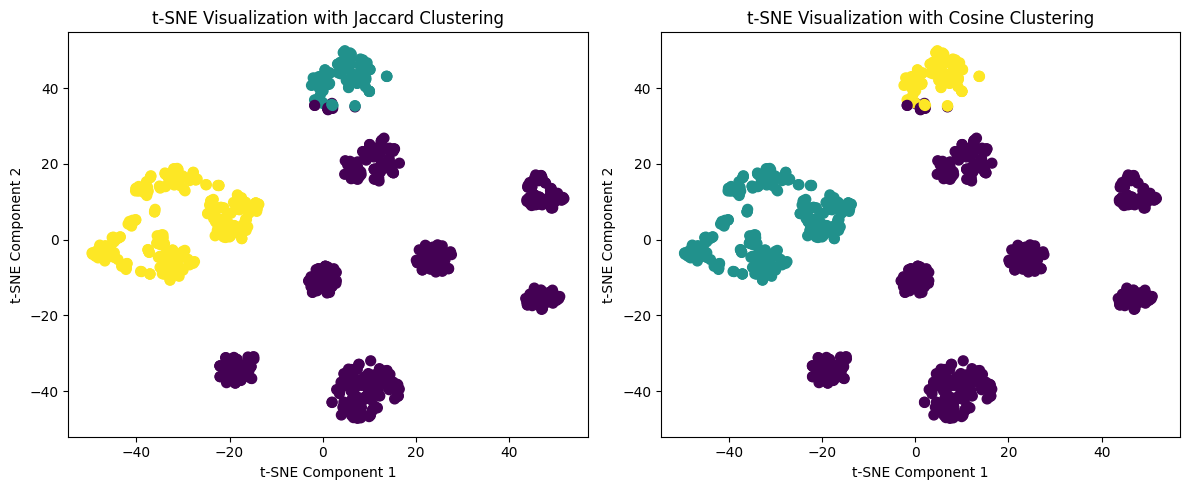

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from scipy.spatial.distance import jaccard, cosine

# Loaded the dataset
file_path = 'hw2_dataset.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Separated ID and features
ids = data['ID']
features = data.drop(columns=['ID'])

# Normalized the features
features_normalized = normalize(features)

# Clustering using KMeans with Jaccard distance
jaccard_distances = pairwise_distances(features_normalized, metric='jaccard')
print("Jaccard Distances:\n", jaccard_distances)

kmeans_jaccard = KMeans(n_clusters=3, random_state=42)
labels_jaccard = kmeans_jaccard.fit_predict(jaccard_distances)

# Clustering using KMeans with Cosine distance
cosine_distances = pairwise_distances(features_normalized, metric='cosine')
print("\nCosine Distances:\n", cosine_distances)

kmeans_cosine = KMeans(n_clusters=3, random_state=42)
labels_cosine = kmeans_cosine.fit_predict(cosine_distances)

# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)

# t-SNE with Jaccard clustering
tsne_results_jaccard = tsne.fit_transform(features_normalized)

# t-SNE with Cosine clustering
tsne_results_cosine = tsne.fit_transform(features_normalized)

# Plotting the results for Jaccard
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(tsne_results_jaccard[:, 0], tsne_results_jaccard[:, 1], c=labels_jaccard, cmap='viridis', s=50)
plt.title('t-SNE Visualization with Jaccard Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Plotting the results for Cosine
plt.subplot(1, 2, 2)
plt.scatter(tsne_results_cosine[:, 0], tsne_results_cosine[:, 1], c=labels_cosine, cmap='viridis', s=50)
plt.title('t-SNE Visualization with Cosine Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


Hamming Distances:
 [[0.         0.41210938 0.91699219 ... 0.85449219 0.80371094 0.87207031]
 [0.41210938 0.         0.92871094 ... 0.85253906 0.90820312 0.875     ]
 [0.91699219 0.92871094 0.         ... 0.8984375  0.92871094 0.90625   ]
 ...
 [0.85449219 0.85253906 0.8984375  ... 0.         0.85449219 0.84765625]
 [0.80371094 0.90820312 0.92871094 ... 0.85449219 0.         0.87011719]
 [0.87207031 0.875      0.90625    ... 0.84765625 0.87011719 0.        ]]
Manhattan Distances:
 [[ 0.         15.70521377 13.95728592 ... 18.14773162  6.72127249
  16.0531626 ]
 [15.70521377  0.         14.80634489 ... 17.99886703 14.50437724
  16.27645948]
 [13.95728592 14.80634489  0.         ... 18.92021577 13.0260743
  16.28357967]
 ...
 [18.14773162 17.99886703 18.92021577 ...  0.         17.05506823
  19.65507964]
 [ 6.72127249 14.50437724 13.0260743  ... 17.05506823  0.
  14.89120545]
 [16.0531626  16.27645948 16.28357967 ... 19.65507964 14.89120545
   0.        ]]


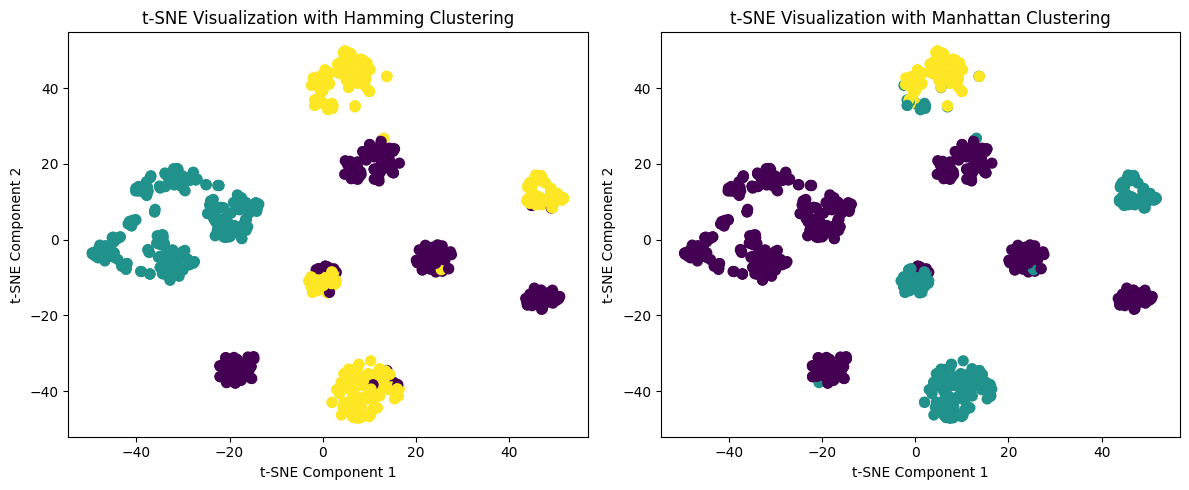

In [25]:
# other methods tried!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

# Loaded the dataset
file_path = 'hw2_dataset.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Separated ID and features
ids = data['ID']
features = data.drop(columns=['ID'])

# Normalized the features
features_normalized = normalize(features)

# Clustering using KMeans with Hamming distance
hamming_distances = pairwise_distances(features_normalized, metric='hamming')
print("Hamming Distances:\n", hamming_distances)  # Output Hamming distance matrix
kmeans_hamming = KMeans(n_clusters=3, random_state=42)
labels_hamming = kmeans_hamming.fit_predict(hamming_distances)

# Clustering using KMeans with Manhattan distance
manhattan_distances = pairwise_distances(features_normalized, metric='manhattan')
print("Manhattan Distances:\n", manhattan_distances)  # Output Manhattan distance matrix
kmeans_manhattan = KMeans(n_clusters=3, random_state=42)
labels_manhattan = kmeans_manhattan.fit_predict(manhattan_distances)

# Performed t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)

# t-SNE with Hamming clustering
tsne_results_hamming = tsne.fit_transform(features_normalized)

# t-SNE with Manhattan clustering
tsne_results_manhattan = tsne.fit_transform(features_normalized)

# Plotting the results for Hamming
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(tsne_results_hamming[:, 0], tsne_results_hamming[:, 1], c=labels_hamming, cmap='viridis', s=50)
plt.title('t-SNE Visualization with Hamming Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Plotting the results for Manhattan
plt.subplot(1, 2, 2)
plt.scatter(tsne_results_manhattan[:, 0], tsne_results_manhattan[:, 1], c=labels_manhattan, cmap='viridis', s=50)
plt.title('t-SNE Visualization with Manhattan Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


Continued Question 4. Also, Think whether the default distance metric is appropriate for your dataset or not.


Given the binary nature of the dataset, where each feature is represented as either 0 or 1, Euclidean distance is not the most appropriate distance metric. This is because Euclidean distance tends to overemphasize differences in magnitudes, which isn't relevant in binary datasets.

For binary data, I tried alternative distance metrics such as Hamming distance, Jaccard similarity, or Manhattan distance might be more suitable:


5. Visualize results using the dimensionality reduction (UMAP or tSNE) techniques with respect to the cluster labels.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


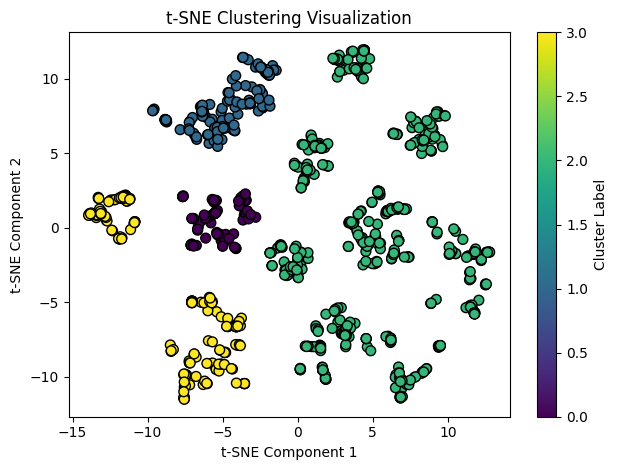

In [31]:
import pandas as pd ## tsne values for different clusters
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import jaccard
import numpy as np
import matplotlib.pyplot as plt


# Sample data scaling and clustering (this part should already be done)
data = pd.read_csv('hw2_dataset.csv')
non_numeric_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])
data_numeric = data.apply(pd.to_numeric, errors='coerce').dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Example clustering (you may already have these clusters from your earlier work)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# 5. Visualize results using t-SNE
# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

plt.subplot(1, 1, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()


The plot shows how the data clusters are spread in the 2D t-SNE space, using KMeans clustering results (with 4 clusters, as determined by my earlier analysis).
The points are colored according to their cluster label from KMeans, and this allows us to assess how well-separated the clusters are in this reduced dimensional space.



In [33]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


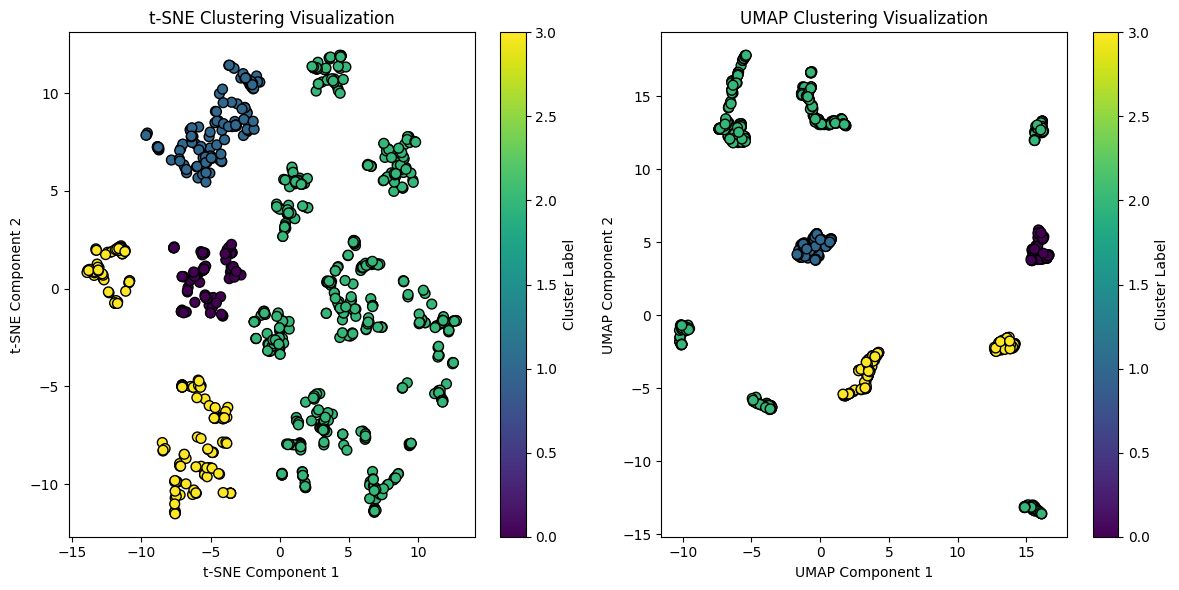

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('hw2_dataset.csv')
non_numeric_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])
data_numeric = data.apply(pd.to_numeric, errors='coerce').dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Clustering using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# UMAP Visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
data_umap = umap_model.fit_transform(data_scaled)

# Plotting
plt.figure(figsize=(12, 6))

# t-SNE Plot
plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')

# UMAP Plot
plt.subplot(1, 2, 2)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=clusters_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('UMAP Clustering Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()
